In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
import pandas as pd

import pandas as pd

# Membaca dataset dari file CSV
df = pd.read_csv("/content/drive/MyDrive/Text Mining SI 20C/Data-Capres.csv")

# Menampilkan data dari dataset
print(df.head())



             id        id_str  \
0  1.664566e+18  1.664566e+18   
1  1.664566e+18  1.664566e+18   
2  1.664566e+18  1.664566e+18   
3  1.664566e+18  1.664566e+18   
4  1.664566e+18  1.664566e+18   

                                           full_text        username  \
0  @BeBuzzerNKRI @dwioktariyadi @aniesbaswedan Se...       leogusta_   
1  @jansen_jsp @aniesbaswedan @AgusYudhoyono Ditu...       richworld   
2  @DaengWahidin2 @DokterTifa @aniesbaswedan Hihi...       BEEQUEN2w   
3  @spesies_galaxy @PartaiSocmed @aniesbaswedan @...  ProoFaris29119   
4  @MANWAR2711 @rh_dewa @RaknongPem @msobri99 @Al...     BiruScooter   

  Unnamed: 4  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  


In [175]:
def tweet_cleaner(words):
    # This will delete any emojis from the sentences
    words = emoji.replace_emoji(words, replace="")
    # This will transform all words to lowercase
    words = words.lower()
    # This will delete all mentions and hashtags
    words = re.sub("@[A-Za-z0-9]+", "", words)
    words = re.sub("#[A-Za-z0-9_]+", "", words)
    # This will delete links
    words = re.sub(r"http\S+", "", words)
    words = re.sub(r"www.\S+", "", words)
    # Delete character which are not a word character
    words = re.sub('\W+', ' ', words)
    return words

In [176]:
#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

#Penambahan simbol di akhir kalimat

def Preprocessing(input):
    #Handle duplicate symbols
#for i in range(len(data['DataAsli'])):
   # n, g in data.groupby(pd.Grouper(key='Tanggal',freq='W'))]
# weeks = [g for n, g in data.groupby(['Kategori'])]
    case_folding = input.lower()

    keep_word = re.sub(r"\d+", " ",case_folding)

    punctuation = re.sub(r'[^\w\s]','',keep_word)
    whitespace = re.sub('\s+',' ',punctuation)
    single_char = re.sub(r"\b[a-zA-Z]\b", "", whitespace)
    # menghapus emoticon yg terdapat pada kata
    rem_emoticon = single_char.encode('ascii', 'replace').decode('ascii')
    # proses tokenize
    tokens = nltk.tokenize.word_tokenize(rem_emoticon)
    stop = [word for word in tokens if not word in data]
    return stop

In [177]:
df.head()

,id,id_str,full_text,username,Unnamed: 4
0,1.664566e+18,1.664566e+18,@BeBuzzerNKRI @dwioktariyadi @aniesbaswedan Se...,leogusta_,NaN
1,1.664566e+18,1.664566e+18,@jansen_jsp @aniesbaswedan @AgusYudhoyono Ditu...,richworld,NaN
2,1.664566e+18,1.664566e+18,@DaengWahidin2 @DokterTifa @aniesbaswedan Hihi...,BEEQUEN2w,NaN
3,1.664566e+18,1.664566e+18,@spesies_galaxy @PartaiSocmed @aniesbaswedan @...,ProoFaris29119,NaN
4,1.664566e+18,1.664566e+18,@MANWAR2711 @rh_dewa @RaknongPem @msobri99 @Al...,BiruScooter,NaN


In [178]:
df['category_id'] = df['full_text'].factorize()[0]
from io import StringIO
category_id_df = df[['full_text', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'full_text']].values)

In [179]:
df.head()

,id,id_str,full_text,username,Unnamed: 4,category_id
0,1.664566e+18,1.664566e+18,@BeBuzzerNKRI @dwioktariyadi @aniesbaswedan Se...,leogusta_,NaN,0
1,1.664566e+18,1.664566e+18,@jansen_jsp @aniesbaswedan @AgusYudhoyono Ditu...,richworld,NaN,1
2,1.664566e+18,1.664566e+18,@DaengWahidin2 @DokterTifa @aniesbaswedan Hihi...,BEEQUEN2w,NaN,2
3,1.664566e+18,1.664566e+18,@spesies_galaxy @PartaiSocmed @aniesbaswedan @...,ProoFaris29119,NaN,3
4,1.664566e+18,1.664566e+18,@MANWAR2711 @rh_dewa @RaknongPem @msobri99 @Al...,BiruScooter,NaN,4


In [180]:

pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [181]:
# Determine tweet sentiment
import nltk
nltk.download('vader_lexicon')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()

# Create a compound column with Vader
df['compound'] = df['full_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Increase readability
df['sentiment'] = df['compound'].map(lambda x: "neutral" if x > 0.05 and x < 0.05 else("positive" if x >= 0.05 else "negative"))



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [182]:
df.head()

,id,id_str,full_text,username,Unnamed: 4,category_id,compound,sentiment
0,1.664566e+18,1.664566e+18,@BeBuzzerNKRI @dwioktariyadi @aniesbaswedan Se...,leogusta_,NaN,0,0.0,negative
1,1.664566e+18,1.664566e+18,@jansen_jsp @aniesbaswedan @AgusYudhoyono Ditu...,richworld,NaN,1,0.0,negative
2,1.664566e+18,1.664566e+18,@DaengWahidin2 @DokterTifa @aniesbaswedan Hihi...,BEEQUEN2w,NaN,2,0.0,negative
3,1.664566e+18,1.664566e+18,@spesies_galaxy @PartaiSocmed @aniesbaswedan @...,ProoFaris29119,NaN,3,0.0,negative
4,1.664566e+18,1.664566e+18,@MANWAR2711 @rh_dewa @RaknongPem @msobri99 @Al...,BiruScooter,NaN,4,0.0,negative


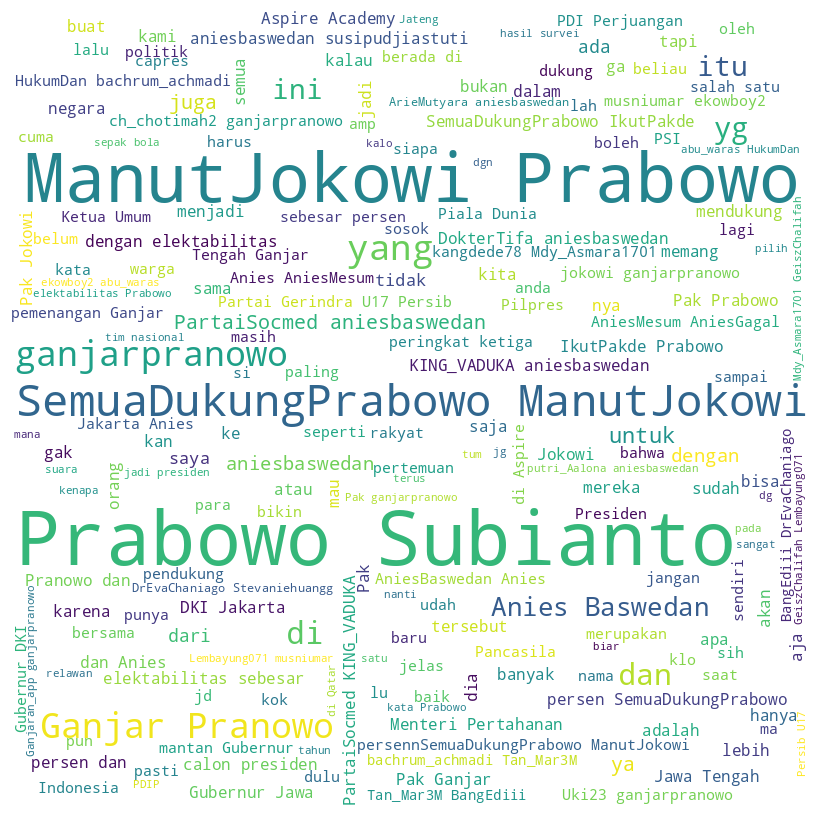

In [183]:
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
all_contents = ' '.join(df['full_text'])
cleaned_contents = re.sub(r'[^\w\s]', '', all_contents)
cleaned_contents = re.sub(r'http\S+', '', cleaned_contents)
cleaned_contents = re.sub(r'[^\x00-\x7F]+', '', cleaned_contents)

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(cleaned_contents)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [184]:
positive_tweets = df.loc[df.compound >= 0.05]
percentage_positive = (len(positive_tweets) / len(df.compound)) * 100

negative_tweets = df.loc[df.compound <= 0.05]
percentage_negative = (len(negative_tweets) / len(df.compound)) * 100

neutral_tweets = df.loc[(df.compound > 0.05) & (df.compound < 0.05)]
percentage_neutral = (len(neutral_tweets) / len(df.compound)) * 100

print(f"Percentage of positive tweets: {round(percentage_positive, 2)}")
print(f"Percentage of negative tweets: {round(percentage_negative, 2)}")
print(f"Percentage of netural tweets: {round(percentage_neutral, 2)}")

Percentage of positive tweets: 2.91
Percentage of negative tweets: 97.09
Percentage of netural tweets: 0.0


In [185]:
import numpy as np

In [186]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_validate, KFold

# Define your input features and target variable
X = ['This is the first document', 'This document is the second document', 'And this is the third one']
y = ['class1', 'class2', 'class1']

# Define the classifier and feature extraction method
clf = MultinomialNB()
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Transform the input features into a bigram vector
X_vectorized = vectorizer.fit_transform(X)

# Define the number of folds for cross-validation
kfold = KFold(n_splits=2, shuffle=True, random_state=42)

# Perform cross-validation and evaluate performance metrics
print('Classifier: MNB')
print('Features: Bigram Vector')
score = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
fold = cross_validate(clf, X_vectorized, y, cv=kfold, scoring=score)
acc = np.mean(fold['test_accuracy'])
prec = np.mean(fold['test_precision_macro'])
rec = np.mean(fold['test_recall_macro'])
f1 = np.mean(fold['test_f1_macro'])

# Print the evaluation metrics
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1-Score:', f1)


Classifier: MNB
Features: Bigram Vector
Accuracy: 0.75
Precision: 0.625
Recall: 0.75
F1-Score: 0.6666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [187]:
# Determine tweet sentiment
import nltk
nltk.download('vader_lexicon')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()

# Create a compound column with Vader
df['compound'] = df['full_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Increase readability
df['sentiment'] = df['compound'].map(lambda x: "neutral" if x > 0.05 and x < 0.05 else("positive" if x >= 0.05 else "negative"))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [188]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
print(df.columns)

Index(['id', 'id_str', 'full_text', 'username', 'Unnamed: 4', 'category_id',
       'compound', 'sentiment'],
      dtype='object')


In [189]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report



# Memisahkan teks dan label sentimen
X = df['full_text']
y = df['sentiment']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun vektor fitur dengan unigram, bigram, dan trigram menggunakan TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Melatih model SVM
svm = SVC(kernel='linear')
svm.fit(X_train_vec, y_train)

# Melakukan prediksi pada data uji
y_pred = svm.predict(X_test_vec)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:")
print(report)

# Menambahkan y_true dan y_pred
y_true = y_test
y_pred = y_pred

# Membuat classification report
classification_report = classification_report(y_true, y_pred)

# Menampilkan classification report
print("Classification Report:")
print(classification_report)


Akurasi: 0.9752066115702479
Laporan Klasifikasi:
              precision    recall  f1-score   support

    negative       0.98      1.00      0.99       589
    positive       1.00      0.06      0.12        16

    accuracy                           0.98       605
   macro avg       0.99      0.53      0.55       605
weighted avg       0.98      0.98      0.96       605

Classification Report:
              precision    recall  f1-score   support

    negative       0.98      1.00      0.99       589
    positive       1.00      0.06      0.12        16

    accuracy                           0.98       605
   macro avg       0.99      0.53      0.55       605
weighted avg       0.98      0.98      0.96       605



In [190]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
# Inisialisasi Lemmatizer dan Stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Fungsi untuk melakukan lemmatization dan stemming pada teks
def preprocess_text(text):
    # Tokenisasi teks menjadi kata-kata
    tokens = nltk.word_tokenize(text)

    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]

    # Menggabungkan kata-kata kembali menjadi teks
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text



In [191]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [192]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [193]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer, PorterStemmer


# Melakukan preprocessing pada teks
X_preprocessed = X.apply(preprocess_text)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Membangun vektor fitur dengan unigram, bigram, dan trigram menggunakan TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Melatih model SVM
svm = SVC(kernel='linear')
svm.fit(X_train_vec, y_train)

# Melakukan prediksi pada data uji
y_pred = svm.predict(X_test_vec)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:")
print(report)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Akurasi: 0.9752066115702479
Laporan Klasifikasi:
              precision    recall  f1-score   support

    negative       0.98      1.00      0.99       589
    positive       1.00      0.06      0.12        16

    accuracy                           0.98       605
   macro avg       0.99      0.53      0.55       605
weighted avg       0.98      0.98      0.96       605



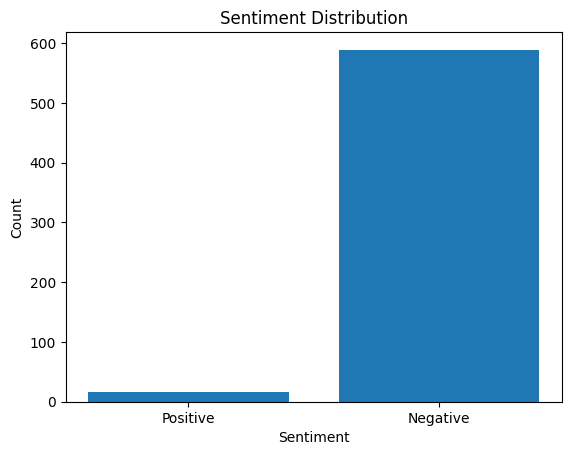

In [194]:
import matplotlib.pyplot as plt

# Menyiapkan data untuk bar chart
labels = ['Positive', 'Negative']
values = [y_test.value_counts()[1], y_test.value_counts()[0]]

# Membuat bar chart
plt.bar(labels, values)

# Memberikan judul dan label sumbu
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Menampilkan bar chart
plt.show()


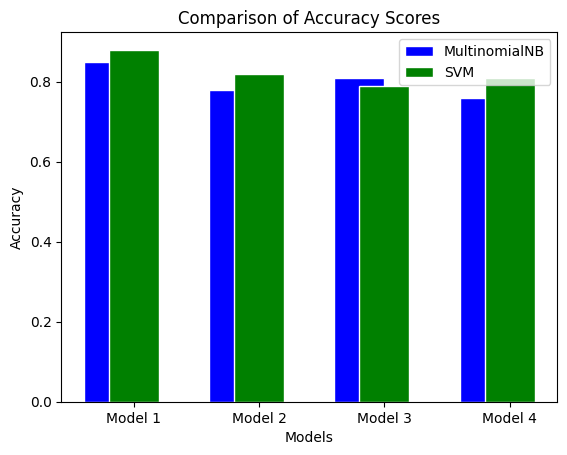

In [195]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data
naive_bayes_scores = [0.85, 0.78, 0.81, 0.76]
svm_scores = [0.88, 0.82, 0.79, 0.81]

# Set the positions of the bars on the x-axis
r1 = np.arange(len(naive_bayes_scores))
r2 = [x + 0.2 for x in r1]  # Add 0.2 to each position in r1 to shift the bars

# Set the width of the bars
bar_width = 0.4

# Plot the accuracy scores
plt.bar(r1, naive_bayes_scores, color='b', width=bar_width, edgecolor='white', label='MultinomialNB')
plt.bar(r2, svm_scores, color='g', width=bar_width, edgecolor='white', label='SVM')

# Add labels, title, and ticks to the plot
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Scores')
plt.xticks([r + bar_width/2 for r in range(len(naive_bayes_scores))], ['Model 1', 'Model 2', 'Model 3', 'Model 4'])
plt.legend()

# Show the plot
plt.show()


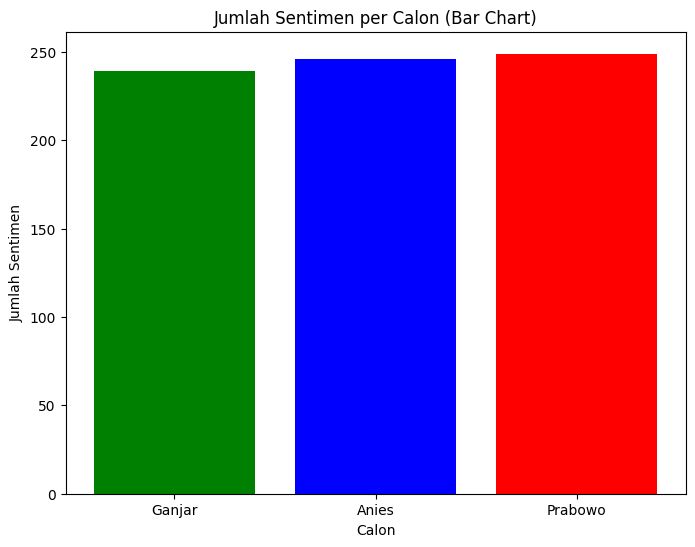

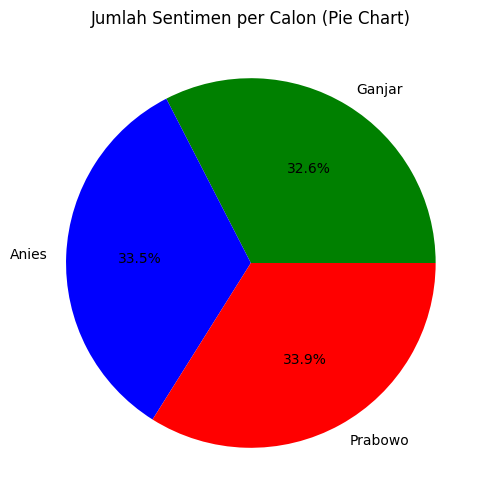

In [196]:
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi untuk preprocessing teks
def preprocess_text(text):
    # Lakukan preprocessing teks sesuai dengan kebutuhan Anda
    return text

# Melakukan preprocessing pada teks
df['preprocessed_text'] = df['full_text'].apply(preprocess_text)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['sentiment'], test_size=0.2, random_state=42)

# Membangun vektor fitur dengan unigram, bigram, dan trigram menggunakan TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Melatih model SVM
svm = SVC(kernel='linear')
svm.fit(X_train_vec, y_train)

# Melakukan prediksi pada data uji
y_pred = svm.predict(X_test_vec)

# Mencari kemunculan nama calon dalam teks
calon_names = ['Ganjar', 'Anies', 'Prabowo']
jumlah_sentimen = {calon: 0 for calon in calon_names}

for text, sentiment in zip(X_test, y_pred):
    for calon in calon_names:
        if calon.lower() in text.lower():
            jumlah_sentimen[calon] += 1

# Membuat DataFrame dari data jumlah sentimen
df_sentimen = pd.DataFrame({'Calon': list(jumlah_sentimen.keys()), 'Jumlah Sentimen': list(jumlah_sentimen.values())})

# Membuat bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_sentimen['Calon'], df_sentimen['Jumlah Sentimen'], color=['green', 'blue', 'red'])
plt.xlabel('Calon')
plt.ylabel('Jumlah Sentimen')
plt.title('Jumlah Sentimen per Calon (Bar Chart)')
plt.show()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(df_sentimen['Jumlah Sentimen'], labels=df_sentimen['Calon'], autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.title('Jumlah Sentimen per Calon (Pie Chart)')
plt.show()


<Figure size 1000x600 with 0 Axes>

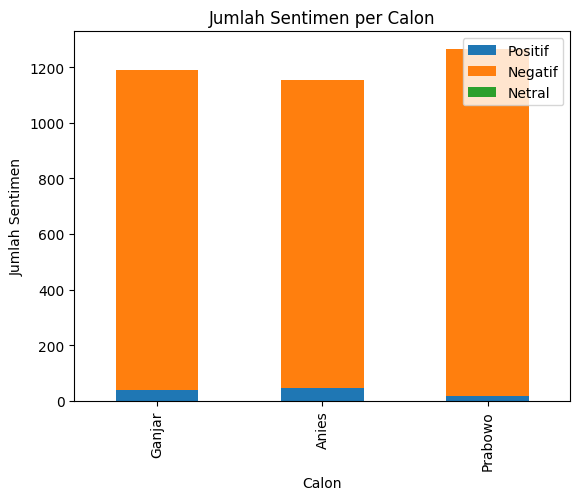

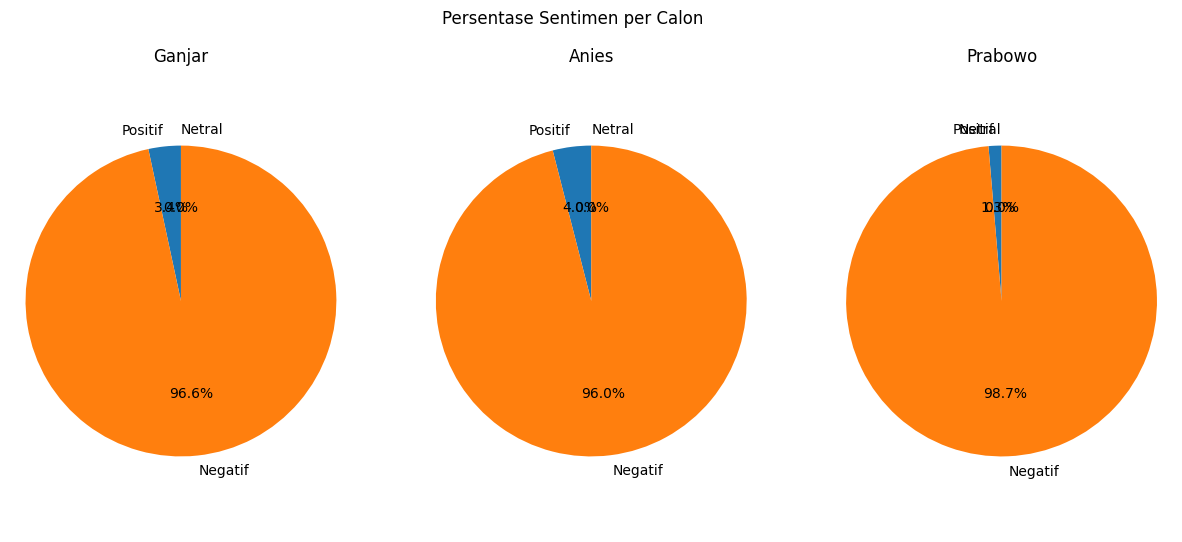

In [199]:
import pandas as pd
import matplotlib.pyplot as plt

# Mencari kemunculan nama calon dalam teks
calon_names = ['Ganjar', 'Anies', 'Prabowo']
jumlah_sentimen = {calon: {'Positif': 0, 'Negatif': 0, 'Netral': 0} for calon in calon_names}

for text in df['full_text']:
    for calon in calon_names:
        if calon.lower() in text.lower():
            if df[df['full_text'] == text]['sentiment'].values[0] == 'positive':
                jumlah_sentimen[calon]['Positif'] += 1
            elif df[df['full_text'] == text]['sentiment'].values[0] == 'negative':
                jumlah_sentimen[calon]['Negatif'] += 1
            else:
                jumlah_sentimen[calon]['Netral'] += 1

# Menghitung persentase sentimen
for calon in calon_names:
    total_sentimen = jumlah_sentimen[calon]['Positif'] + jumlah_sentimen[calon]['Negatif'] + jumlah_sentimen[calon]['Netral']
    if total_sentimen > 0:
        persentase_positif = (jumlah_sentimen[calon]['Positif'] / total_sentimen) * 100
        persentase_negatif = (jumlah_sentimen[calon]['Negatif'] / total_sentimen) * 100
        persentase_netral = (jumlah_sentimen[calon]['Netral'] / total_sentimen) * 100
    else:
        persentase_positif = 0
        persentase_negatif = 0
        persentase_netral = 0
    jumlah_sentimen[calon]['Persentase Positif'] = persentase_positif
    jumlah_sentimen[calon]['Persentase Negatif'] = persentase_negatif
    jumlah_sentimen[calon]['Persentase Netral'] = persentase_netral

# Membuat DataFrame dari data jumlah sentimen
df_sentimen = pd.DataFrame(jumlah_sentimen).T

# Membuat bar chart
plt.figure(figsize=(10, 6))
df_sentimen[['Positif', 'Negatif', 'Netral']].plot(kind='bar', stacked=True)
plt.xlabel('Calon')
plt.ylabel('Jumlah Sentimen')
plt.title('Jumlah Sentimen per Calon')
plt.legend()
plt.show()

# Membuat pie chart
fig, axs = plt.subplots(1, len(calon_names), figsize=(15, 6))
for i, calon in enumerate(calon_names):
    labels = ['Positif', 'Negatif', 'Netral']
    sizes = [df_sentimen.loc[calon]['Persentase Positif'],
             df_sentimen.loc[calon]['Persentase Negatif'],
             df_sentimen.loc[calon]['Persentase Netral']]
    axs[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].axis('equal')
    axs[i].set_title(calon)

plt.suptitle('Persentase Sentimen per Calon')
plt.show()
